In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load a subset with 1000 instances of the MNIST digits dataset
digits = pd.read_csv('https://static-resources.zybooks.com/MachineLearning/digits.csv')
digits_sample = digits.sample(1500, random_state=1234)

In [3]:
# Subset input and output features
X = digits_sample.iloc[:,:-1]
y = digits_sample[['class']]

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
# Build a pipeline that fits an PCA model to the scaled training data
scaler = MinMaxScaler()
pca = PCA(n_components=2, random_state=123)
pipeline_pca = Pipeline(steps=[('scaler',scaler),('pca',pca)])
X_transformed = pipeline_pca.fit_transform(X_train, np.ravel(y_train))

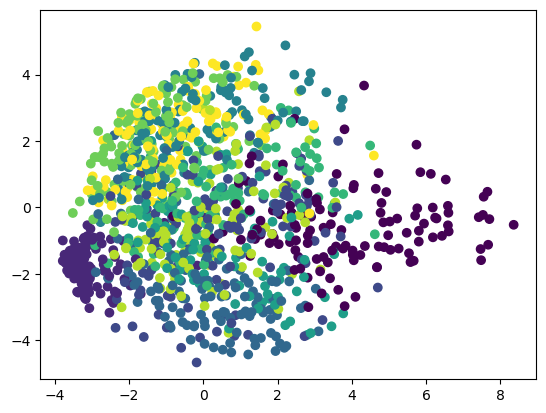

In [6]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=np.ravel(y_train), cmap='viridis')

In [7]:
# Build a pipeline that fits an MDS model to the scaled training data
isomap = Isomap(n_components=2, n_neighbors=25)
pipeline_isomap = Pipeline(steps=[('scaler',scaler),('isomap',isomap)])
X_transform_isomap = pipeline_isomap.fit_transform(X_train)

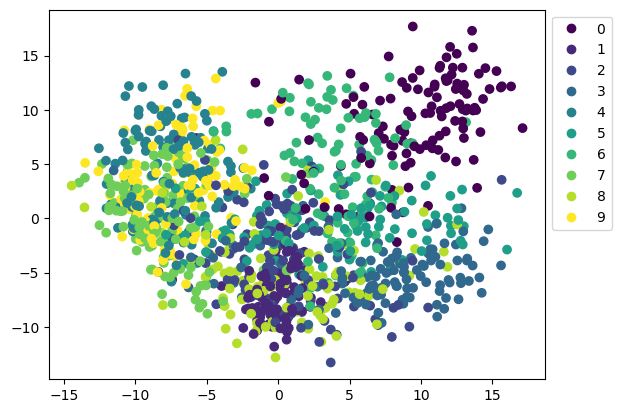

In [8]:
# Plot the MDS mapping
fig, plot = plt.subplots()
plt.prism()
scatter = plot.scatter(X_transform_isomap[:, 0], X_transform_isomap[:, 1], c=np.ravel(y_train), cmap='viridis')
plt.legend(bbox_to_anchor=(1, 1), handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])

In [9]:
# Display the data points in lower-dimensional space
pd.DataFrame(isomap.embedding_)

,0,1
0,1.189301,0.388339
1,-9.934208,8.191176
2,-9.235755,7.075449
3,7.874288,11.031819
4,5.902129,10.470773
...,...,...
1195,3.244966,1.027695
1196,-4.070361,-3.002710
1197,-6.491954,0.701069
1198,-3.380109,-4.886779


In [10]:
# Display the KernelPCA object used in the mapping
isomap.kernel_pca_

KernelPCA(kernel='precomputed', n_components=2)

In [11]:
# Display the geodesic distances in higher-dimensional space
isomap.dist_matrix_

array([[ 0.        , 20.45935157, 20.40571333, ..., 13.523862  ,
        20.77015777, 20.77075612],
       [20.45935157,  0.        ,  6.37591348, ..., 15.23293857,
        21.40570092, 20.75178582],
       [20.40571333,  6.37591348,  0.        , ..., 19.17101448,
        21.26793448, 20.68746984],
       ...,
       [13.523862  , 15.23293857, 19.17101448, ...,  0.        ,
        20.06110335, 20.0617017 ],
       [20.77015777, 21.40570092, 21.26793448, ..., 20.06110335,
         0.        , 13.95027132],
       [20.77075612, 20.75178582, 20.68746984, ..., 20.0617017 ,
        13.95027132,  0.        ]])

In [12]:
# Display the nearest neighbors object used in the mapping
isomap.nbrs_

NearestNeighbors(n_neighbors=25, radius=None)